In [1]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [2]:
def find_face (x1, x2, stu):
    
    max = 0.0
    sdnt = ''
    flag = 0
    
    for s in stu:
        temp = norm.pdf (x1, np.mean (stu [s] ['x1']), stu [s]['sd'])
        if (temp > max and temp > 0.00000001):
            max = temp
            sdnt = s
            flag = 1
            
    if (flag == 0):
        stu [len (stu) + 1] = {'x1': [x1], 'df':pd.DataFrame (), 'sd': 10}
        return (len (stu), stu)
    
    stu [sdnt] ['x1'].append (x1)
    return (sdnt, stu)

In [3]:
df = pd.DataFrame()
students = {}


cap = cv2.VideoCapture(0)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

for i in range(500):
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    
    for face in faces:
        
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
        
        f, students = find_face (x1, x2, students)
        
        landmarks = predictor(gray, face)
        xc = []
        yc = []
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            xc.append(x)
            yc.append(y)
            cv2.circle(frame, (x, y), 4, (255, 0, 0), -1)
            
        students [f] ['df'] ['x'+str(i)] = xc
        students [f] ['df'] ['y'+str(i)] = yc  
    
    cv2.imshow("Frame", frame)
    

    key = cv2.waitKey(1)
    if key == 27:
        break
        
cap.release ()
cv2.destroyAllWindows ()

In [4]:
len (students)

2

In [8]:
faces

rectangles[[(204, 204) (307, 307)], [(421, 245) (493, 317)]]

In [18]:
students

{1: {'x1': [231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,
   231,

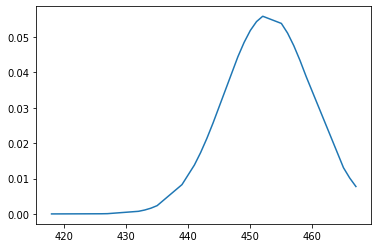

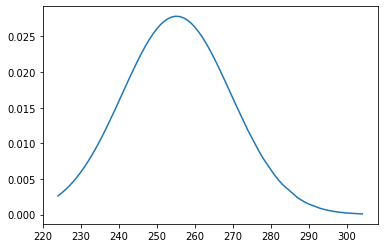

In [11]:
for s in students:
    
    nt = students [s] ['df'].values [33].tolist()
    ntx = nt [0::2]
    ntx.sort()
    mean = np.mean (ntx)
    sigma = np.std (ntx)
    #plt.ylim ((0, 1))
    plt.plot (ntx, norm.pdf (ntx, mean, sigma))
    plt.show ()

NameError: name 'xx1' is not defined

In [ ]:
xx2

In [ ]:
norm.pdf (350, 450, 15)

In [ ]:
sd

In [79]:
students

{1: {'x1': [437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   437,
   429,
   429,
   429,
   429,
   437,
   437,
   437,
   437,
   429,
   437,
   429,
   429,
   429,
   429,
   437,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,
   429,

In [23]:
students [1] ['df']

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,x495,y495,x496,y496,x497,y497,x498,y498,x499,y499
0,242,202,242,205,242,203,242,203,241,201,...,245,199,246,201,246,199,245,202,248,200
1,242,215,242,217,242,216,242,216,241,214,...,245,212,245,214,246,212,244,215,247,213
2,242,228,243,230,243,229,242,230,241,227,...,245,226,246,227,246,225,245,228,247,226
3,244,242,245,243,245,242,244,244,243,241,...,247,240,247,240,248,239,247,241,249,239
4,249,255,248,256,249,255,249,257,247,254,...,251,253,251,254,251,252,251,254,253,253
5,257,267,256,268,256,267,257,268,256,266,...,259,265,259,265,259,263,260,265,260,264
6,268,275,268,276,268,276,268,276,267,275,...,271,273,271,273,271,272,272,272,272,272
7,282,280,281,281,281,282,282,282,281,281,...,285,277,284,278,285,277,286,277,285,278
8,297,281,296,282,296,283,297,283,296,283,...,300,278,300,278,300,278,301,278,300,278
9,312,280,310,281,311,282,312,281,311,281,...,315,277,315,277,315,277,315,277,315,277
